# PREDICCIÓN DEL COMPORTAMIENTO AL CONDUCIR 

In [253]:
#importación de librerias necesarias
import numpy as np
#importar libreria pandas para el dataset
import pandas as pd
#librería para la división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#librería para el escalamiento de los datos 
from sklearn.preprocessing import StandardScaler
#librería para las métricas
from sklearn.metrics import accuracy_score
#librería para los gráficos
import matplotlib.pyplot as plt
#importar librería para gráficos
import seaborn as sns
#También
from sklearn import preprocessing
# Import label encoder


In [254]:
js = pd.read_csv("test_motion_data.csv")
js.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924


In [255]:

  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
js['Class']= label_encoder.fit_transform(js['Class'])
  
js['Class'].unique()

array([0, 1, 2])

## SE REALIZA LA DESCRIPCIÓN DEL DATASET UTILIZADO 
El Dataset contiene datos los cuales seran usados para un aprendizaje profundo y el aprendizaje automático  con el proposito de predecir el comportamiento de conducción, según lo informado por la AAA Foundation for Traffic Safety , 106,727 accidentes fatales, el 55.7 por ciento del total, durante un período reciente de cuatro años involucraron a conductores que cometieron una o más acciones de conducción agresivas. Por tanto, aplicando los metodos de Naive bayes y hidden markov model se prentende responder lo siguiente ¿cómo predecir comportamientos de conducción peligrosos de forma rápida y precisa? <br>
Link del dataset usado: https://www.kaggle.com/datasets/outofskills/driving-behavior

## PROBLEMA A RESOLVER


# CARACTERIZACIÓN DEL DATASET
#Instancias del data set

In [256]:
#contar registros del dataset
js.count()

AccX         3683
AccY         3683
AccZ         3683
GyroX        3683
GyroY        3683
GyroZ        3683
Class        3683
Timestamp    3683
dtype: int64

In [257]:
#muestra la información (incluido el tipo de dato) de los 20 atributos de entrada.
js.drop('Class', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3683 non-null   float64
 1   AccY       3683 non-null   float64
 2   AccZ       3683 non-null   float64
 3   GyroX      3683 non-null   float64
 4   GyroY      3683 non-null   float64
 5   GyroZ      3683 non-null   float64
 6   Timestamp  3683 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 201.5 KB


# Se realiza la limpieza de datos

In [258]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = js[['Class']]
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

# Se realiza la busqueda de valores nulos

In [259]:
#Comprobación de valores nulos en datos de entrada
X.isnull().sum()

AccX         0
AccY         0
AccZ         0
GyroX        0
GyroY        0
GyroZ        0
Timestamp    0
dtype: int64

No existen valores nulos se continua comprobando si existen valores nulos en la varible objetivo

In [260]:
#Comprobación de valores nulos en la variable objetivo
y.isnull().sum()

Class    0
dtype: int64

La variable objetivo tampoco tiene valores nulos.

# SE REALIZA LA BUSQUEDA DE VALORES DUPLICADOS

In [261]:
#Comprobación de valores nulos en la variable objetivo
y.isnull().sum()

Class    0
dtype: int64

# SELECCION DE CARACTERÍSTICAS

In [262]:
#Se comprueba en cada valor de entrada la correlacion con la variable de salida
for a in js.columns :
    try :
        print(f'Corr {a}: {js[a].corr(df["Class"])}')
    except :
        pass

# SE REMUEVEN LOS VALORES

In [263]:
#Genero un set con las instancias de mis atributos o caracteristicas seleciconas
variables_seleccionadas = ['GyroX','AccX','GyroY']
#Remuevo Valores Atipicos en funcion de aquellos valores fuera de los cuartiles 
for a in variables_seleccionadas: 
    q1 = js[a].quantile(0.25)
    q3 = js[a].quantile(0.75)
    iqr = q3-q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    js = js[(js[a] > 0) & (js[a] < upper)]

In [264]:
#imprime las características que tiene mayor correlación
X.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Timestamp      int64
dtype: object

In [265]:
#Se procede a imprimir los valores unicos de la variable de salida
np.unique(y)

array([0, 1, 2])

# SE REALIZA LA DIVICION DEL SET EN DATOS DE ENTRANAMIENTO

In [266]:
#importo libreria para la division del set de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [267]:
#Código que realice la división en entrenamiento y test, de acuerdo con la estretgia de evaluación planeada. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [268]:
#Determino el tamaño del set de entrenamiento
X_train.shape, X_test.shape

((2578, 7), (1105, 7))

In [269]:
#Determino el tamaño del set de prueba
y_train.shape, y_test.shape

((2578, 1), (1105, 1))

# SE IMPLEMENTA EL MODELO DE NAIVE-BAYES

In [270]:
#Importo libreria encargado del modelo de Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Defino el Modelo
gnb = GaussianNB()
#Entreno el modelo y aplico en el set de prueba
y_pred = gnb.fit(X_train, y_train).predict(X_test)

C:\Users\chave\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SE REALIZA LA EVALUACIÓN

In [271]:
#Importo libreria para obtener el valor del accuracy o la matriz de confusion ademas de libreria para graficar
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


#Obtengo el accuracy del modelo de Naive Bayes
acc_score_naive = accuracy_score(y_test, y_pred)


print(acc_score_naive)

0.7285067873303167


In [272]:
#Obtengo la matriz de confusion para este modelo
se = confusion_matrix(y_test, y_pred)
print(se)

[[265   0   0]
 [109 162 191]
 [  0   0 378]]


In [273]:
#Importo la librria para generar un reporte con las principales metricas del modelo
from sklearn.metrics import classification_report
#Imprimo las metricas como el accuracy, precision, recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       265
           1       1.00      0.35      0.52       462
           2       0.66      1.00      0.80       378

    accuracy                           0.73      1105
   macro avg       0.79      0.78      0.72      1105
weighted avg       0.82      0.73      0.69      1105



In [274]:
#Importo libreria para obtener metricas para obtener precision recall f1
from sklearn.metrics import precision_recall_fscore_support as score
precision_naive,recall_naive,fscore_naive,support_naive=score(y_test,y_pred,average='macro')

# COMPARATIVA DE LOS DOS MODELOS NAIVE Y MARKOV

In [300]:
#Se presenta los valores de las principales metricas para los 3 algoritmos
print(acc_score_naive,precision_naive,recall_naive,fscore_naive)
print(acc_score_markov,precision_markov,recall_markov,fscore_markov)

0.7285067873303167 0.7909598413578564 0.7835497835497836 0.71565406452076
0.2559241706161137 0.1591869536950083 0.24165020372885543 0.1754424802083004


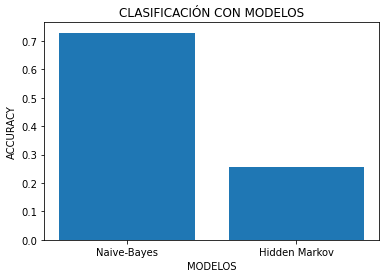

In [303]:
#Libreria para presentación de datos de comparación de resultados
import matplotlib.pyplot as plt
eje_x = ['Naive-Bayes', 'Hidden Markov']
 
## Declaramos valores para el eje y
eje_y = [acc_score_naive,acc_score_markov]
 
## Creamos Gráfica
plt.bar(eje_x, eje_y)
 
## Legenda en el eje y
plt.ylabel('ACCURACY')
 
## Legenda en el eje x
plt.xlabel('MODELOS')
 
## Título de Gráfica
plt.title('CLASIFICACIÓN CON MODELOS')
 
## Mostramos Gráfica
plt.show()

# SE APLICA EL MODELO DE FUZZY PROBABILISTICO

In [297]:
#Importo Libreria que permite usar el modelo mencionado anteriormente
from fcmeans import FCM

ModuleNotFoundError: No module named 'fcmeans'

In [277]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = js[['Class']]
#Separando las caracteristicas 
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

In [278]:
### Estandarización de la data ###
# importar metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [279]:
#Almacenamiento del objeto de ajuste para referencia posterior
#Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)

In [280]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

In [281]:
#Implemento el modelo fuzzy probabilistico
modelo_fuzzy = FCM(n_clusters=4,init=1.7,random_state=0, fuzzifier=2) #Seleccionamos 4 cluster
modelo_fuzzy.fit(X) ## X, numpy array. rows:samples columns:features

NameError: name 'FCM' is not defined

# SE APLICA EL MODELO DE HIDDEN MARKOV MODEL

In [283]:

from hmmlearn.hmm import GaussianHMM
js.head()

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
7,0.043449,0.228911,0.354669,0.070250,0.050320,0.077427,0,818926
11,0.364388,0.234002,-0.873113,0.090408,0.052763,0.412181,0,818928
18,0.102754,2.449629,-0.089049,0.019548,0.000229,-0.086285,0,818932
27,0.182101,-0.162865,-0.165545,0.011606,0.038103,-0.021533,0,818937
33,0.029505,0.107665,0.494569,0.004887,0.016112,-0.008705,0,818940


In [284]:
#Transformación de las caracteristicas 
# Variable objetivo y variables de entrada
y = js[['Class']]
X = js[['AccX','AccY','AccZ','GyroX','GyroY','GyroZ','Timestamp']]

In [285]:
#imprime las características que tiene mayor correlación
X.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Timestamp      int64
dtype: object

In [286]:
### Estandarización de la data ###
# importar metodo de scalado standar
from sklearn.preprocessing import StandardScaler
# Formar objeto de scala para entradas
VariablesEntradaScaler=StandardScaler()

In [287]:
#Almacenamiento del objeto de ajuste para referencia posterior
#Datos de entrada
VariablesEntradaFit=VariablesEntradaScaler.fit(X)


In [288]:
#Generación de los valores estandarizados de X e y
#Datos e entrada
X=VariablesEntradaFit.transform(X)

# MODELO

In [289]:
#Implemento el modelo de Markov
model = GaussianHMM(n_components=4, covariance_type="diag", n_iter=2000).fit(X)
# Predigo la secuencia optima de estados
y_pred_markov = model.predict(X)
y_pred_markov

array([3, 3, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 3, 3, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,

# SE EVALUA EL MODELO

In [290]:
#Implemento el mismo proceso que se mostro en la seccion de Naive Bayes para la evaluacion
from sklearn.metrics import accuracy_score
#Importo libreria para obtener metricas y matriz de confusion 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
#Importo libreria para graficos
import matplotlib.pyplot as plt
#Obtengo el acuraccy del modelo
acc_score_markov = accuracy_score(y, y_pred_markov)

# impromo el accuracy
print(acc_score_markov)

0.2559241706161137


In [291]:
#Muestro la matriz de confusion para el modelo markov
si = confusion_matrix(y, y_pred_markov)
print(si)

[[65 22  0  2]
 [68 43 64  7]
 [85 62  0  4]
 [ 0  0  0  0]]


In [292]:
#Imprimo variable de salida de test.
y

,Class
7,0
11,0
18,0
27,0
33,0
...,...
3633,1
3659,1
3664,1
3666,1


In [293]:
#Importo libreria para metricas y genero reporte con recall precision y accuracy
from sklearn.metrics import classification_report

print(classification_report(y, y_pred_markov))

              precision    recall  f1-score   support

           0       0.30      0.73      0.42        89
           1       0.34      0.24      0.28       182
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00         0

    accuracy                           0.26       422
   macro avg       0.16      0.24      0.18       422
weighted avg       0.21      0.26      0.21       422



C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [294]:
precision_markov,recall_markov,fscore_markov,support_markov=score(y,y_pred_markov,average='macro')

C:\Users\chave\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
